In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Preprocessed_Podcast_data.csv")
dataset

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
1,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
2,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
3,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
4,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
...,...,...,...,...,...,...,...,...,...,...,...
539043,Fashion Forward,Episode 75,48.67,Lifestyle,88.62,Wednesday,Evening,25.65,3.0,Positive,42.08465
539044,Style Guide,Episode 83,23.52,Lifestyle,38.14,Tuesday,Evening,86.17,0.0,Neutral,19.71374
539045,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
539046,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [3]:
from Univariate import Univariate

In [4]:
quan,qual=Univariate.quanQual(dataset)

In [5]:
descriptive=Univariate.descriptive(dataset,quan)
descriptive

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Max,181.125,119.46,115.62,5,119.97
Min,1.24,1.3,0,0,0
Mean,64.5567,59.729,52.234,1.32384,45.8113
Median,63.67,59.75,53.63,1,43.7598
Mode,34.4,38.68,68.53,0,0
Q1:25%,35.95,39.36,28.26,0,23.3127
Q2:50%,63.67,59.75,53.63,1,43.7598
Q3:75%,94.02,79.37,76.69,2,65.1925
Q4:100%,181.125,119.46,115.62,5,119.97
IQR,58.07,40.01,48.43,2,41.8798


In [6]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=['unique_values','frequency','relative_frequency','cumsum'])
    freqTable['unique_values']=dataset[columnName].value_counts().index
    freqTable['frequency']=dataset[columnName].value_counts().values
    freqTable['relative_frequency']=freqTable['frequency']/freqTable['unique_values'].count()
    freqTable['cumsum']=freqTable['relative_frequency'].cumsum()
    return freqTable

In [7]:
freqTable("Number_of_Ads",dataset)

,unique_values,frequency,relative_frequency,cumsum
0,0.0,158700,31740.0,31740.0
1,1.0,158186,31637.2,63377.2
2,3.0,111080,22216.0,85593.2
3,2.0,111075,22215.0,107808.2
4,5.0,7,1.4,107809.6


In [8]:
freqTable("Listening_Time_minutes",dataset)

,unique_values,frequency,relative_frequency,cumsum
0,0.00000,4967,0.116233,0.116233
1,10.55000,98,0.002293,0.118527
2,11.91000,79,0.001849,0.120375
3,19.71000,79,0.001849,0.122224
4,7.92000,77,0.001802,0.124026
...,...,...,...,...
42728,94.98415,1,0.000023,12.614233
42729,35.84065,1,0.000023,12.614256
42730,46.43959,1,0.000023,12.614279
42731,45.76704,1,0.000023,12.614303


In [9]:
table=pd.DataFrame(index=['kurtosis','skew'],columns=quan)
for columnName in quan:
    table[columnName]['kurtosis']=dataset[columnName].kurtosis()
    table[columnName]['skew']=dataset[columnName].skew()
table

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
kurtosis,-1.20591,-1.20373,-1.15589,-1.26714,-0.666626
skew,0.00565495,0.0148638,-0.107256,0.253588,0.346809


In [10]:
import seaborn as sns

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


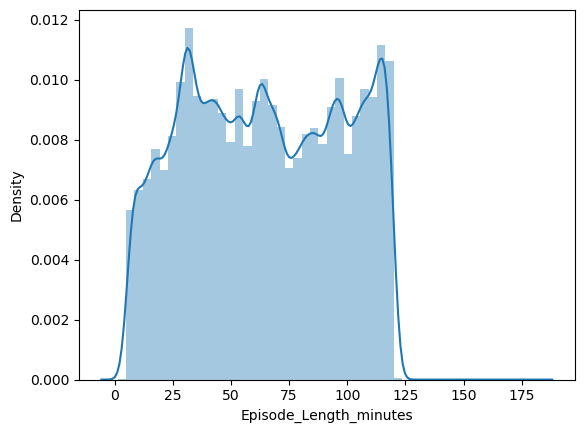

In [11]:
sns.distplot(dataset["Episode_Length_minutes"])

In [12]:
def get_pdf_probability(dataset,startrange,endrange): #giving the inputs dataset,start range,end range as parameters.
    from matplotlib import pyplot     # importing matplotlib for plotting graph
    from scipy.stats import norm      # importing spicy.stats for using normal distribution
    import seaborn as sns             # importing seaborn for giving colors to the graph
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')  # distplot is used to see the distribution
    pyplot.axvline(startrange,color='Red')      # axv line is the vertical line. used here to denote the starting range
    pyplot.axvline(endrange,color='Red')    # axv line is the vertical line. used here to denote the end range
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()          # calculating mean and std dev
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))   # printing mean and std dev with 3 decimal values
    # define the distribution
    dist = norm(sample_mean, sample_std)  # computes the norm
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)] # one liner for 'for' loop . it creates 'value' as list.
    probabilities = [dist.pdf(value) for value in values]  # calculating the probability values and plotting distribution plot.
    prob=sum(probabilities)  # adding the probability values
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities))) #printing area which is the sum of probabilities
    return prob
    

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=64.557, Standard Deviation=32.890
The area between range(40,60):0.21583374984689307


0.21583374984689307

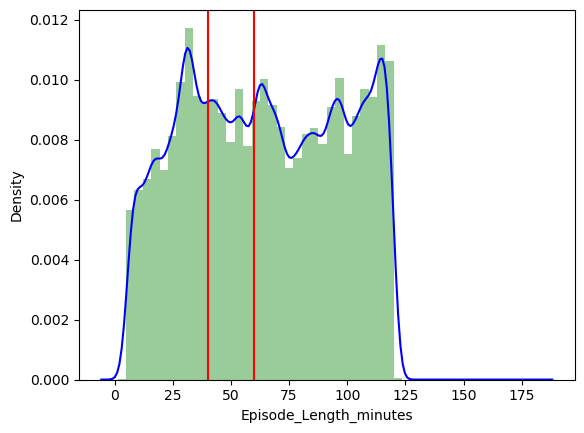

In [13]:
get_pdf_probability(dataset["Episode_Length_minutes"],40,60)

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['Episode_Length_minutes'])
ecdf(80)

0.6342143927813478

In [15]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean() # finds mean of the dataset
    std=dataset.std()   # finds standard deviation

    values=[i for i in dataset] # creates the list values

    z_score=[((j-mean)/std) for j in values] # for each values in the list 'values' it calculates z_score and adds it to the list'z_score

    sns.distplot(z_score,kde=True)   #using distplot to plot the distribution for converted values

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


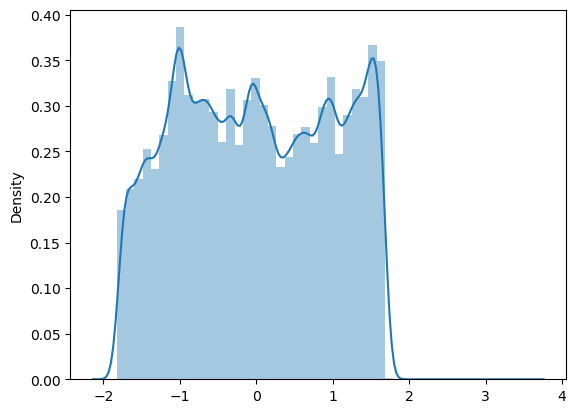

In [16]:
stdNBgraph(dataset["Episode_Length_minutes"])

In [17]:
dataset.cov()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1081.727060,15.819830,-9.090359,-1.990843,819.941474
Host_Popularity_percentage,15.819830,521.853403,15.031591,-0.535634,28.684640
Guest_Popularity_percentage,-9.090359,15.031591,812.842630,0.284689,-10.287516
Number_of_Ads,-1.990843,-0.535634,0.284689,1.220074,-3.696259
Listening_Time_minutes,819.941474,28.684640,-10.287516,-3.696259,741.535691


In [18]:
dataset.corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.021056,-0.009694,-0.054801,0.915499
Host_Popularity_percentage,0.021056,1.000000,0.023080,-0.021228,0.046111
Guest_Popularity_percentage,-0.009694,0.023080,1.000000,0.009040,-0.013251
Number_of_Ads,-0.054801,-0.021228,0.009040,1.000000,-0.122886
Listening_Time_minutes,0.915499,0.046111,-0.013251,-0.122886,1.000000


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [20]:
dataset.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [21]:
calc_vif(dataset[["Episode_Length_minutes","Host_Popularity_percentage","Guest_Popularity_percentage","Number_of_Ads"]])

,variables,VIF
0,Episode_Length_minutes,3.692931
1,Host_Popularity_percentage,4.733681
2,Guest_Popularity_percentage,3.522651
3,Number_of_Ads,2.177193


In [22]:
#### Independant Sample- Unpaired T Test 1
#Diferrent Group(Comedy, Health) but same contion(Listening_Time_minutes)

In [23]:
comedy = dataset[dataset['Genre']=='Comedy']['Listening_Time_minutes']
health = dataset[dataset['Genre']=='Health']['Listening_Time_minutes']

In [24]:
from scipy.stats import ttest_ind
ttest_ind(comedy,health)

Ttest_indResult(statistic=-7.855355664795504, pvalue=4.0216356823174615e-15)

In [25]:
### independent sample t test 2

In [26]:
night_df=dataset[dataset["Publication_Time"]=='Night']

In [28]:
night_crime = dataset[dataset['Genre']=='True Crime']['Listening_Time_minutes']
night_sports = dataset[dataset['Genre']=='Sports']['Listening_Time_minutes']

In [30]:
from scipy.stats import ttest_rel
ttest_ind(night_crime, night_sports)

Ttest_indResult(statistic=6.1927768176237254, pvalue=5.929769714814316e-10)

In [31]:
import scipy.stats as stats

stats.f_oneway(dataset["Episode_Length_minutes"],dataset['Listening_Time_minutes'])


F_onewayResult(statistic=103888.83008241268, pvalue=0.0)

In [32]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [33]:
model = ols('Listening_Time_minutes ~ C(Genre) + C(Episode_Sentiment) + C(Genre):C(Episode_Sentiment)', data=dataset).fit() 
anova_table = sm.stats.anova_lm(model, type=2) 
print(anova_table)

                                     df        sum_sq        mean_sq  \
C(Genre)                            9.0  2.209929e+05   24554.767091   
C(Episode_Sentiment)                2.0  5.115422e+05  255771.105728   
C(Genre):C(Episode_Sentiment)      18.0  3.079037e+04    1710.575947   
Residual                       539018.0  3.989593e+08     740.159446   

                                        F         PR(>F)  
C(Genre)                        33.174970   5.446432e-59  
C(Episode_Sentiment)           345.562172  1.048060e-150  
C(Genre):C(Episode_Sentiment)    2.311091   1.257857e-03  
Residual                              NaN            NaN  


In [34]:
Anova= pd.DataFrame(anova_table)
Anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),9.0,2.209929e+05,24554.767091,33.174970,5.446432e-59
C(Episode_Sentiment),2.0,5.115422e+05,255771.105728,345.562172,1.048060e-150
C(Genre):C(Episode_Sentiment),18.0,3.079037e+04,1710.575947,2.311091,1.257857e-03
Residual,539018.0,3.989593e+08,740.159446,NaN,NaN
